# Visualizing BO results

In [1]:
import numpy as np 

# read the npy data from results
rdkit_gprq = np.load('./results/fair_split_trial50/lipo_rdkit_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()
rdkit_rf = np.load('./results/fair_split_trial50/lipo_rdkit_ratio0.1_iter20_trial50RandomForest.npy', allow_pickle=True).item()
random = np.load('./results/fair_split_trial50/lipo_mol2vec_ratio0.1_iter20_trial50GPRQ_random.npy', allow_pickle=True).item()

mol2vec_gprq = np.load('./results/fair_split_trial50/lipo_mol2vec_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()
#mol2vec_rf = np.load('./results/fair_split_trial50/lipo_mol2vec_ratio0.1_iter20_trial50RandomForest.npy', allow_pickle=True).item()

e3fp_gptani = np.load('./results/fair_split_trial50/lipo_e3fp_ratio0.1_iter20_trial50GPTanimoto.npy', allow_pickle=True).item()
e3fp_rf = np.load('./results/fair_split_trial50/lipo_e3fp_ratio0.1_iter20_trial50RandomForest.npy', allow_pickle=True).item()

ecfp_gptani = np.load('./results/fair_split_trial50/lipo_ecfp_ratio0.1_iter20_trial50GPTanimoto.npy', allow_pickle=True).item()
ecfp_rf = np.load('./results/fair_split_trial50/lipo_ecfp_ratio0.1_iter20_trial50RandomForest.npy', allow_pickle=True).item()

In [2]:
num_trial = len(mol2vec_gprq['bests_over_trials'])
num_iter = len(mol2vec_gprq['bests_over_trials'][0])

rdkit_gprq_best_observed = np.array(rdkit_gprq['bests_over_trials'])
rdkit_rf_best_observed = np.array(rdkit_rf['best_over_trials'])

mol2vec_gprq_best_observed = np.array(mol2vec_gprq['bests_over_trials'])
#mol2vec_rf_best_observed = np.array(mol2vec_rf['best_over_trials'])

random_best_observed = np.array(random['bests_over_trials'])

e3fp_gptani_best_observed = np.array(e3fp_gptani['bests_over_trials'])
e3fp_rf_best_observed = np.array(e3fp_rf['best_over_trials'])

ecfp_gptani_best_observed = np.array(ecfp_gptani['bests_over_trials'])
ecfp_rf_best_observed = np.array(ecfp_rf['best_over_trials'])


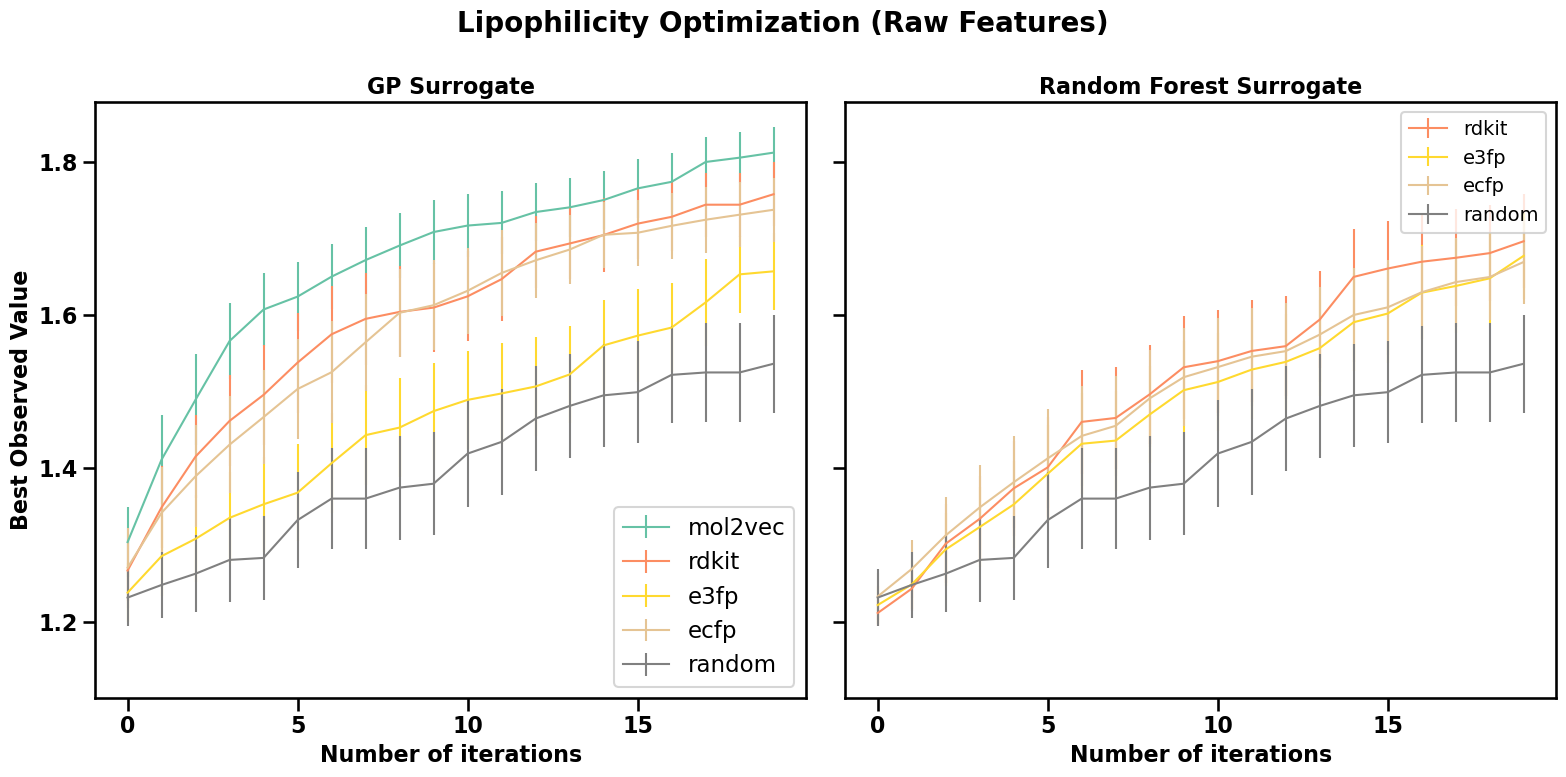

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(num_trial)


#set seaborn style
sns.set_context("talk")

colors = sns.color_palette("Set2", n_colors=8)
#plot the df data and add 
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,8),sharey=True)
#plot errorbar from the mean and std of the best observed value
ax1.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_best_observed.mean(axis=0), yerr=ci(mol2vec_gprq_best_observed), label="mol2vec", color=colors[0],linewidth=1.5)

ax1.errorbar(x=np.arange(num_iter), y=rdkit_gprq_best_observed.mean(axis=0), yerr=ci(rdkit_gprq_best_observed), label="rdkit", color=colors[1],linewidth=1.5)
ax2.errorbar(x=np.arange(num_iter), y=rdkit_rf_best_observed.mean(axis=0), yerr=ci(rdkit_rf_best_observed), label="rdkit",color=colors[1], linewidth=1.5)

#ax.errorbar(x=np.arange(num_iter), y=mol2vec_rf_best_observed.mean(axis=0), yerr=ci(mol2vec_rf_best_observed), label="mol2vec_rf", linewidth=1.5)
ax1.errorbar(x=np.arange(num_iter), y=e3fp_gptani_best_observed.mean(axis=0), yerr=ci(e3fp_gptani_best_observed), label="e3fp", color = colors[5],linewidth=1.5)
ax2.errorbar(x=np.arange(num_iter), y=e3fp_rf_best_observed.mean(axis=0), yerr=ci(e3fp_rf_best_observed), label="e3fp", color = colors[5], linewidth=1.5)
ax1.errorbar(x=np.arange(num_iter), y=ecfp_gptani_best_observed.mean(axis=0), yerr=ci(ecfp_gptani_best_observed), label="ecfp", color = colors[6],linewidth=1.5)
ax2.errorbar(x=np.arange(num_iter), y=ecfp_rf_best_observed.mean(axis=0), yerr=ci(ecfp_rf_best_observed), label="ecfp", color = colors[6],linewidth=1.5)
ax1.errorbar(x=np.arange(num_iter), y=random_best_observed.mean(axis=0), yerr=ci(random_best_observed), label="random", color='grey',linewidth=1.5)
ax2.errorbar(x=np.arange(num_iter), y=random_best_observed.mean(axis=0), yerr=ci(random_best_observed), label="random", color='grey',linewidth=1.5)

plt.xticks(range(0,21))

#set labels
ax1.set(
    xlabel="Number of iterations",
    ylabel="Best Observed Value",
)
ax1.set_ylim(bottom=1.1)
ax1.legend(loc="lower right")

ax2.set(
    xlabel="Number of iterations"
)
ax2.legend(loc="lower right")
#make both plots for publication quality, set font size, thinkness and color
for ax in [ax1, ax2]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color('black')
        item.set_fontweight('bold')

#reduce the size of legned
plt.legend(fontsize=14)

#reduce the number of ticks
plt.locator_params(axis='y', nbins=5)
ax1.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='x', nbins=5)

#set title for the whole plot
plt.suptitle('Lipophilicity Optimization (Raw Features)', fontsize=20, fontweight='bold')
#set subtitle for each subplot
ax1.title.set_text('GP Surrogate')
ax2.title.set_text('Random Forest Surrogate')

plt.tight_layout()
plt.savefig('figures/result1.png',dpi=300)
plt.show()

count hit numbers above threshold

In [75]:
#load the data for ground truth checking
from data_helper import load_lipo_feat
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('rdkit'))

# count the number of molecules added in each iteration are above the threshold
def hit_count(y, threshold, mol_added):
    num_trial = len(mol_added)
    num_iter = len(mol_added[0])
    hit_count = np.zeros((num_trial,num_iter))
    for trial in range(num_trial):
        mol_above_threshold = []
        counter = 0
        for mol_index in mol_added[trial]:
            if y[int(mol_index)] > threshold:
                counter += 1
            mol_above_threshold.append(counter)
        hit_count[trial] = mol_above_threshold
    return hit_count


In [97]:
lipo_threshold = 1.5
# count the number of molecules added in each iteration are above the threshold
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('rdkit'))
rdkit_gprq_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=rdkit_gprq['mol_added'])
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('mol2vec'))
#rdkit_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=rdkit_rf['mol_added'])
mol2vec_gprq_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mol2vec_gprq['mol_added'])
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('mol2vec'))
random_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=random['mol_added'])
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('mol2vec'))
#mol2vec_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mol2vec_rf['mol_added'])
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('e3fp'))
e3fp_gptani_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=e3fp_gptani['mol_added'])
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('e3fp'))
#e3fp_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=e3fp_rf['mol_added'])
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('ecfp'))
ecfp_gptani_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=ecfp_gptani['mol_added'])
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('ecfp'))
#ecfp_rf_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=ecfp_rf['mol_added'])


NameError: name 'mol2vec_gprq_hit_count' is not defined

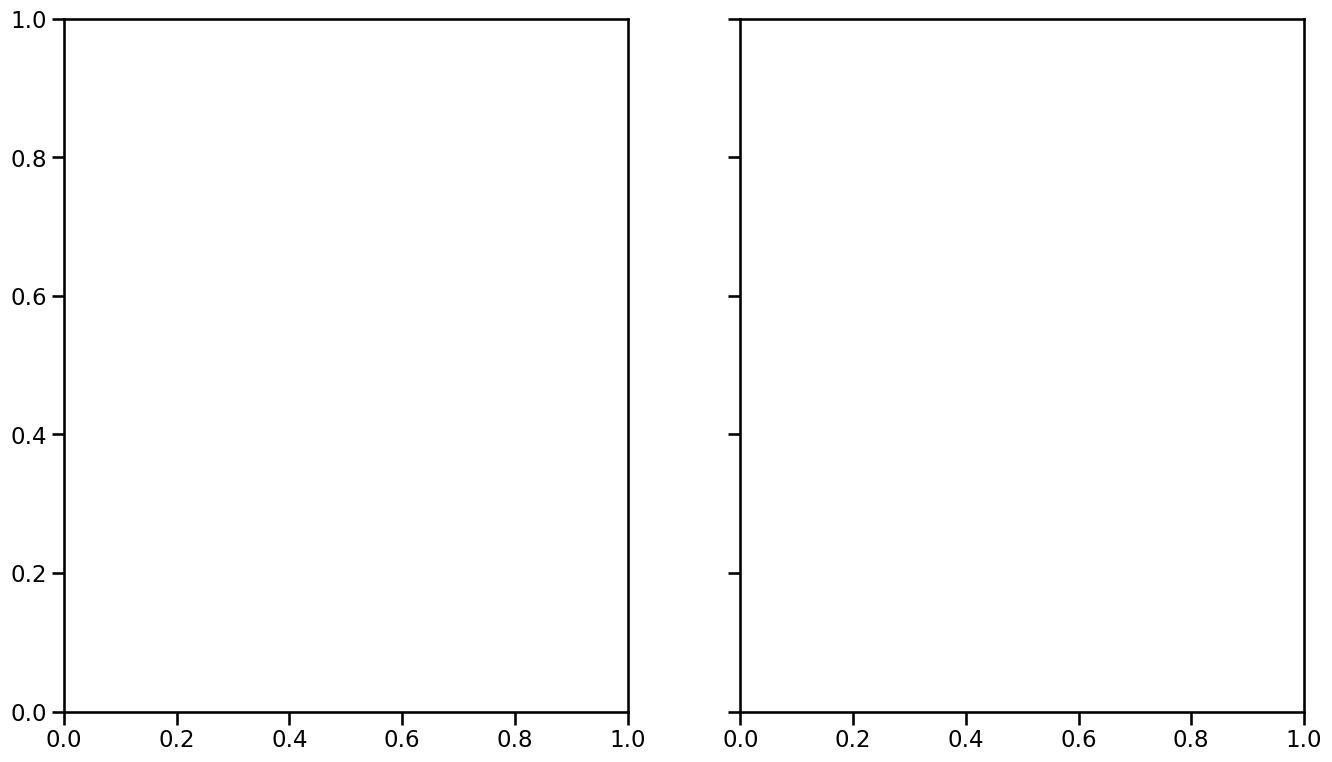

In [4]:
#plot the df data and add 
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 9),sharey=True)
#plot errorbar from the mean and std of the best observed value
ax1.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_hit_count.mean(axis=0), yerr=ci(mol2vec_gprq_hit_count), label="mol2vec", color=colors[0], linewidth=1.5)
ax1.errorbar(x=np.arange(num_iter), y=rdkit_gprq_hit_count.mean(axis=0), yerr=ci(rdkit_gprq_hit_count), label="rdkit",color=colors[1], linewidth=1.5)
#ax2.errorbar(x=np.arange(num_iter), y=rdkit_rf_hit_count.mean(axis=0), yerr=ci(rdkit_rf_hit_count), label="rdkit",color=colors[1], linewidth=1.5)
#ax2.errorbar(x=np.arange(num_iter), y=mol2vec_rf_hit_count.mean(axis=0), yerr=ci(mol2vec_rf_hit_count), label="mol2vec_rf", linewidth=1.5)
ax1.errorbar(x=np.arange(num_iter), y=e3fp_gptani_hit_count.mean(axis=0), yerr=ci(e3fp_gptani_hit_count), label="e3fp",color = colors[5], linewidth=1.5)
#ax.errorbar(x=np.arange(num_iter), y=e3fp_rf_hit_count.mean(axis=0), yerr=ci(e3fp_rf_hit_count), label="e3fp_rf", linewidth=1.5)
ax1.errorbar(x=np.arange(num_iter), y=ecfp_gptani_hit_count.mean(axis=0), yerr=ci(ecfp_gptani_hit_count), label="ecfp", color = colors[6],linewidth=1.5)
#ax.errorbar(x=np.arange(num_iter), y=ecfp_rf_hit_count.mean(axis=0), yerr=ci(ecfp_rf_hit_count), label="ecfp_rf", linewidth=1.5)
ax1.errorbar(x=np.arange(num_iter), y=random_hit_count.mean(axis=0), yerr=ci(random_hit_count), label="random", color = 'grey',linewidth=1.5)

#set labels

plt.xticks(range(0,21))

#set labels
ax1.set(
    xlabel="Number of iterations",
    ylabel="Number of Hit Molecules above Threshold",
)

ax1.legend(loc="lower right")

ax2.set(
    xlabel="Number of iterations"
)
ax2.legend(loc="lower right")
#make both plots for publication quality, set font size, thinkness and color
for ax in [ax1, ax2]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color('black')
        item.set_fontweight('bold')

#reduce the size of legned
plt.legend(fontsize=14)

#reduce the number of ticks
plt.locator_params(axis='y', nbins=5)
ax1.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='x', nbins=5)

#set subtitle for each subplot
ax1.title.set_text('GP Surrogate')
ax2.title.set_text('Random Forest Surrogate')

plt.tight_layout()

plt.show()